In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# import data
life_expect = pd.read_csv('cleaned_data/life_expectancy_data_cleaned.csv')
weather = pd.read_csv('cleaned_data/weather_data_cleaned.csv')

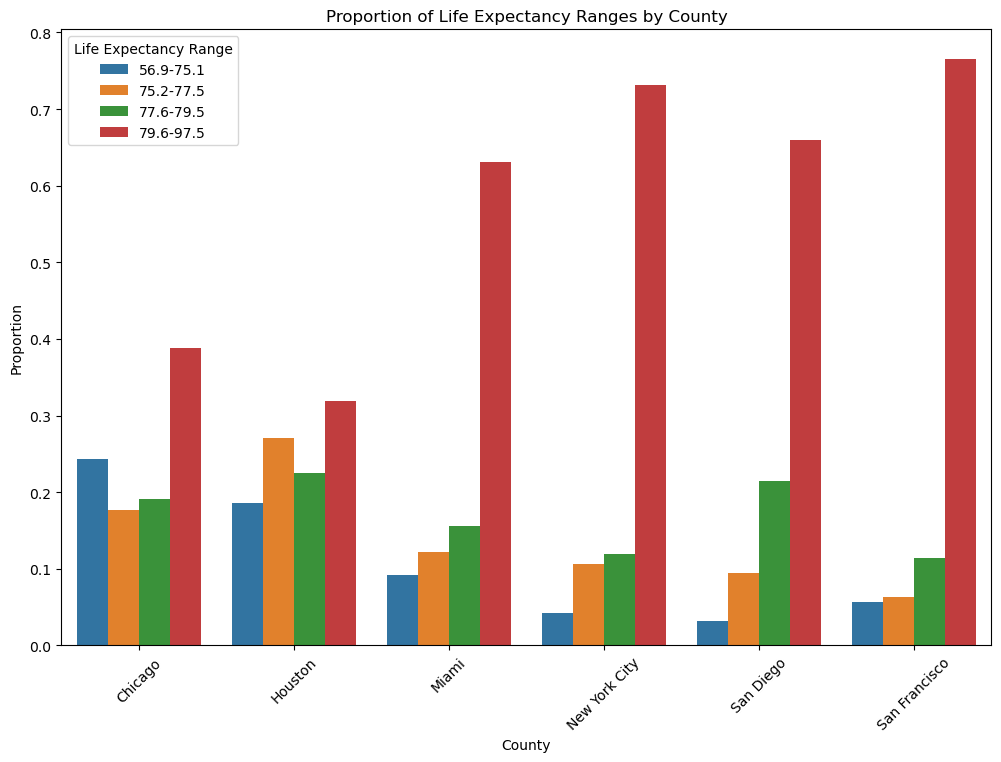

In [10]:
sec_data = life_expect.groupby(['County', 'Life Expectancy Range']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Proportion')

# Combine the two ranges into a single range
sec_data['Life Expectancy Range'] = sec_data['Life Expectancy Range'].replace(['79.6-81.6', '81.7-97.5'], '79.6-97.5')

# Recalculate the proportions
sec_data_agg = sec_data.groupby(['County', 'Life Expectancy Range'])['Proportion'].sum().reset_index()

# Plot the aggregated data


plt.figure(figsize=(12, 8))
sns.barplot(x='County', y='Proportion', hue='Life Expectancy Range', data=sec_data_agg)
plt.title('Proportion of Life Expectancy Ranges by County')
plt.xlabel('County')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Life Expectancy Range')
plt.show()

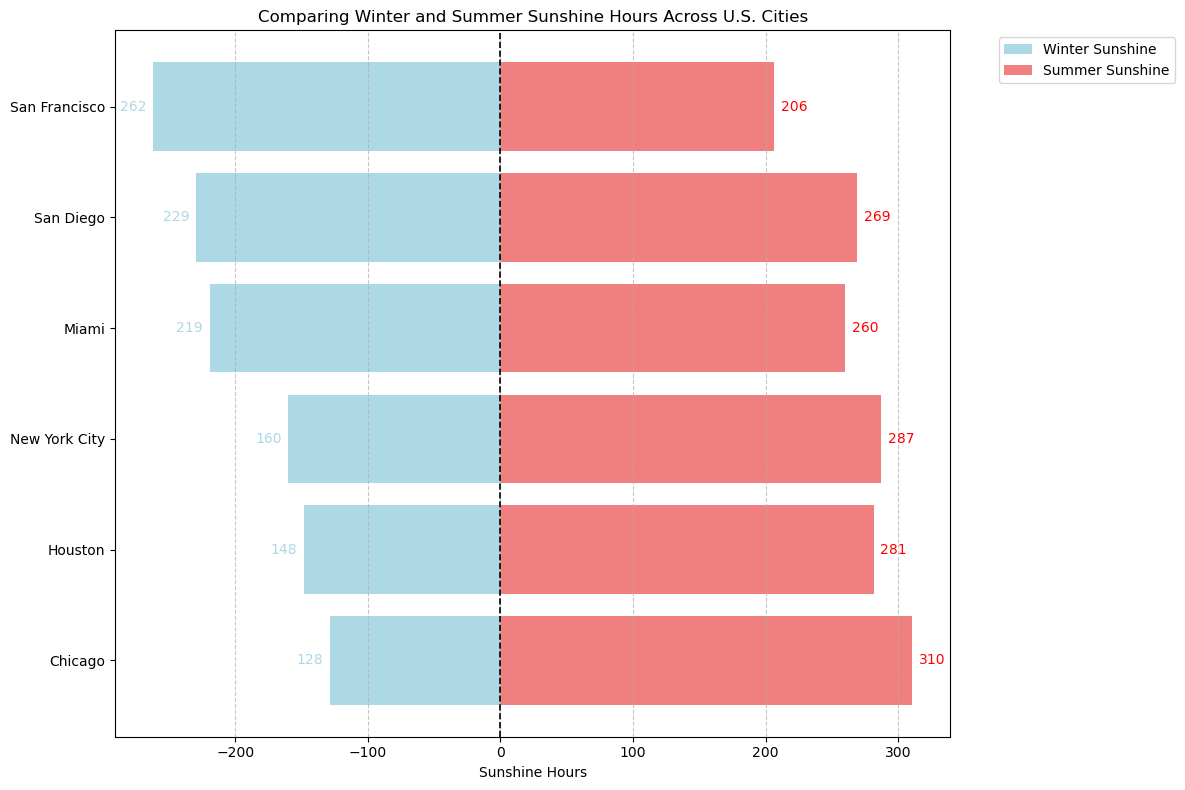

In [11]:
season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

data = pd.read_csv('assests/weather.csv')

data['season'] = data['monthnum'].apply(lambda x : season[x])

# Filter the pivot table to include only Summer and Winter seasons
pivot_data = data.pivot_table(index='city', columns='season', values='sunshine', aggfunc='mean')

pivot_data_filtered = pivot_data[['Summer', 'Winter']]

# Sort the data by Winter sunshine
pivot_data_filtered = pivot_data_filtered.sort_values(by=('Winter'), ascending=False)

# Reverse the order of the bar chart from top to bottom
fig, ax = plt.subplots(figsize=(12, 8))

# Reverse the index order for plotting
pivot_data_filtered_reversed = pivot_data_filtered[::-1]

# Plot Winter sunshine on the left side (negative direction)
bars_winter = ax.barh(pivot_data_filtered_reversed.index, -pivot_data_filtered_reversed['Winter'], color='lightblue', label='Winter Sunshine')

# Plot Summer sunshine on the right side (positive direction)
bars_summer = ax.barh(pivot_data_filtered_reversed.index, pivot_data_filtered_reversed['Summer'], color='lightcoral', label='Summer Sunshine')

# Add value labels for Winter bars
for bar in bars_winter:
    ax.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, 
            f'{int(-bar.get_width())}', ha='right', va='center', fontsize=10, color='lightblue')

# Add value labels for Summer bars
for bar in bars_summer:
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='red')

# Set labels and title
ax.set_xlabel('Sunshine Hours')
ax.set_title('Comparing Winter and Summer Sunshine Hours Across U.S. Cities')

# Add vertical line at zero for separation
ax.axvline(0, color='black', linewidth=1.2, linestyle='--')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add grid lines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()
